In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
r_series = np.loadtxt('./runup', usecols = (0, 4), skiprows=1, dtype=np.float32)
# force_val = force_series[:,1]
# time_val = force_series[:,0]
### for testing ###
r_val = r_series[:,1]
time_val = r_series[:,0]

nd = 0.002099551886
nv = 0.1433858
slope = 0.06

r_norm = r_val/nd
t_norm = slope*time_val*nv/nd

t_max = np.max(t_norm)

In [3]:
plt.style.use('seaborn')

<ipython-input-3-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


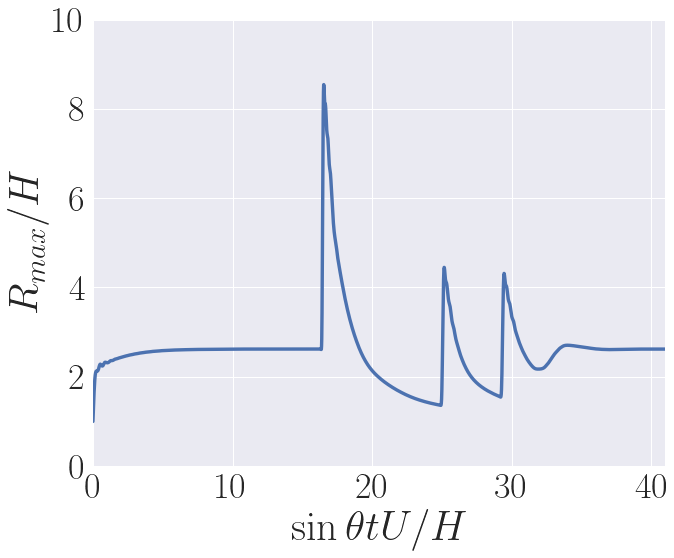

In [5]:
# a static plot for CD
# import seaborn
fig, ax = plt.subplots()
# with plt.style.context(("bmh",)):
# plt.style.use('bmh')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.rcParams['figure.figsize'] = [10.251, 10.251]
plt.subplots_adjust(bottom=0.275)
plt.xlim([0, t_max])
plt.ylim([0, 10])
plt.yticks(np.arange(0.0, (10.0+2), 2))
plt.xlabel(r'$\sin\theta t U/H$', fontsize = 42)
plt.ylabel(r'$R_{max}/H$', fontsize = 42)
plt.plot(t_norm, r_norm, linewidth=3.4)

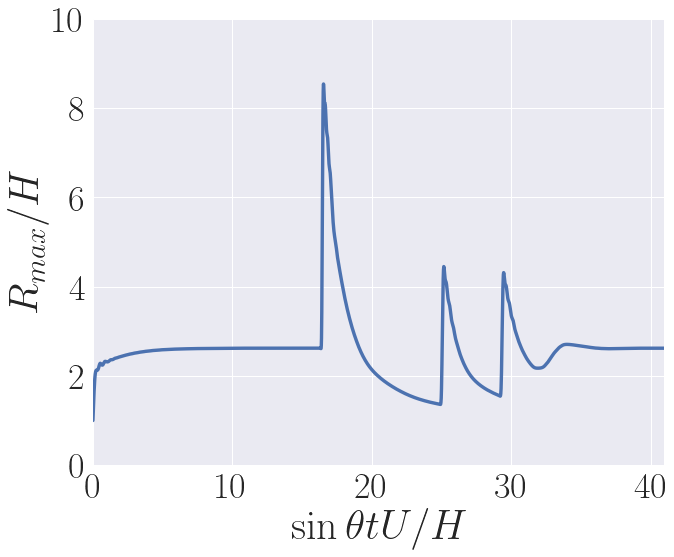

In [6]:
# dynamic CD plot
# import seaborn
import matplotlib
fig, ax = plt.subplots()
# with plt.style.context(("bmh",)):
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.rcParams['figure.figsize'] = [10.251, 10.251]
plt.subplots_adjust(bottom=0.275)
plt.xlim([0, t_max])
plt.ylim([0, 10])
plt.yticks(np.arange(0.0, (10.0+2), 2))
plt.xlabel(r'$\sin\theta t U/H$', fontsize = 42)
plt.ylabel(r'$R_{max}/H$', fontsize = 42)
line, = ax.plot([], [], linewidth=3.4)
def update(num, t_norm, r_norm, time_val, line):
    plt.style.use('bmh')
    plt.rc('text', usetex=True)
    ax.tick_params(axis='both', which='major', labelsize=36)
    ax.tick_params(axis='both', which='minor', labelsize=36)
    plt.rcParams['figure.figsize'] = [10.251, 10.251]
    plt.subplots_adjust(bottom=0.275)
    plt.xlim([0, t_max])
    plt.ylim([0, 10])
    plt.yticks(np.arange(0.0, (10.0+2), 2))
    plt.xlabel(r'$\sin\theta t U/H$', fontsize = 42)
    plt.ylabel(r'$R_{max}/H$', fontsize = 42)
    plt.subplots_adjust(bottom=0.275)
    line.set_data(t_norm[:num], r_norm[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(t_norm), fargs=[t_norm, r_norm, time_val,line],
                              interval=2.5, blit=True)
# ani = animation.FuncAnimation(fig, update, 225, fargs=[time_norm_val, cd_val, line],
#                               interval=2.5, blit=True)
writer = matplotlib.animation.FFMpegWriter(fps=120, codec="h264", bitrate=700000, extra_args=["-preset", "veryslow","-crf","0"])
ani.save('cir_rmax.mp4', writer=writer, dpi=100)
plt.show()